# Data Acquisition:
Using the given function **vsweep** from PROCEDURE_PlasmaExperiment_v2.ipynb, the Keithley was programmed to sweep through a range of voltages, collecting data current and voltage data at each step.
| vlow | vhigh | vstep| vfloat |
| ---  | ---   | ---  | ---    |
| -250 | -100  |  1   | -225   |

The parameters inside of the probe were also measured while the data was being created.

| Parameters           |Run 1 | Run 2 |
| ---------------------| ---- | ----- |
| Pressure (mTorr)     | 387  | 382   |
| Initial Current (mA) | 4.85 | 4.81  |
| Final Current (mA)   | 4.81 | 4.81  |
| Voltage Across Probe | 1200 | 1200  |

# Plotting the data:
The two arrays of current and voltage values are loaded into a pandas dataframe and plotted, as well as the average between the two files. 

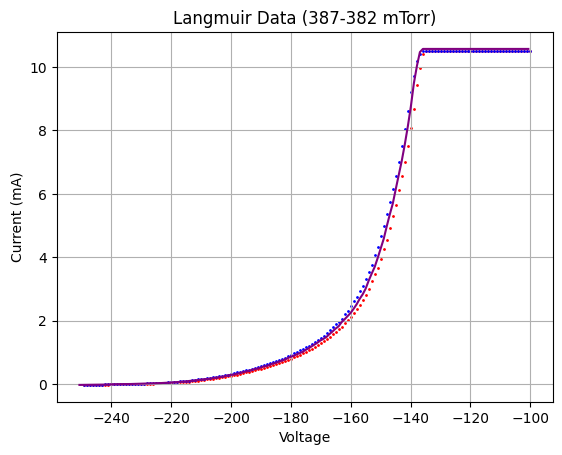

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import pprint

plasma_data1 = pd.read_csv('data/langmuirprobe1.csv')
plasma_data2 = pd.read_csv('data/langmuirprobe2.csv')
# 3rd data file doesn't include the plateau
#plasma_data3 = pd.read_csv('data/langmuirprobe3.csv')
x1 = plasma_data1.iloc[:,0]
y1 = plasma_data1.iloc[:,1] * 10e3

x2 = plasma_data2.iloc[:,0]
y2 = plasma_data2.iloc[:,1] * 10e3

x_avg = x1 + x2 / len(x1)
x_avg = np.array(x_avg, dtype=np.float64)
y_avg = y1 + y2 / len(y1)
y_avg = np.array(y_avg, dtype=np.float64)

plt.scatter(x1, y1, s=1, c='red')
plt.scatter(x2, y2, s=1, c='blue')
plt.plot(x_avg, y_avg, c='purple')
plt.xlabel('Voltage')
plt.ylabel('Current (mA)')
plt.title('Langmuir Data (387-382 mTorr)')
plt.savefig('Langmuir Data.png')
plt.grid(True)
plt.show()

# Data Analysis:
### The Ion Current:
As seen on the data (and as described in Merlino, R.K. (2007)), the current that is measured by the probe has an exponential increase as the voltage across the probe increases until, at a certain point, the current abruptly plateaus. 

Our data was collected as a bias voltage, $V_B$ swept from a negative towards a positive potential. When $V_B$ reaches a critical point in comparison with the plasma potential, $V_P$, the probe measures the ion saturation current, $I_{is}$. From there, positive ions continue to be collected by the probe until $V_B$ reaches $V_P$, and ions begin to be repelled by the probe. 

When $V_B \gg V_P$, all ions are repelled, dropping the ion current, $I_i$ to 0.

At the temperature $T_i$ (the ion temperature), the dependance of the ion current on $V_B$ is given as:

$$\begin{equation}
 I_i(V_B) =
   \left\{\begin{array}{lr}
       -I_{is} exp[\frac{e^{-}(V_P - V_B)}{kT_i}], & V_B \ge V_P \\
       -I_{is}, & V_B \lt V_P 
    \end{array}\right.
 \end{equation}$$

Where:
* $I_i$ is the ion current,

* $I_{is}$ is ion saturation current  
   * Given by $I_{is} = \frac{1}{4}e n_i v_{i,th} A_{probe}$
   * $n_i$ is the ion density, 
   * $v_{i,th}=\sqrt{\frac{8kT_{i}}{\pi m_i}}$ is the ion thermal speed, 
   * $m_i$ is the ion mass,
   * $A_{probe}$ is the probe collecting area
   * When the electron temperature is much greater than the ion temperature ($T_e \gg T_i$), the saturation current is not given by the ion thermal speed, instead given as the Bohm Ion current: $$I_{is}=I_{Bohm}=0.61en_{i}\sqrt{\frac{kT_{e}}{m_i}}A_{probe}$$

* $V_B$ the bias voltage,

* $V_P$ the plasma potential

* $e$ the electron charge
   * $1.60 \cdot 10^{-19}$ J (or 1eV)

* $k$ the Boltzmann constant
   * $1.38 \cdot 10^{-23} J/K$ (or $8.62 \cdot 10^{-5} eV \cdot K$)

### The Electron Current:
For $V_B \gg V_P$, our probe collects an electron saturation current $I_{es}$. At $V_B < V_P$, electrons are partially repelled by the probe. For a Maxwellian electron velocity distribution, the electron current decreases exponentially with decreasing Voltage. For $V_B \ll V_P$ all electrons are repelled, giving $I_e = 0$. The electron current can be expressed as: 
$$\begin{equation}
 I_{e}(V_B) =
   \left\{\begin{array}{lr}
       -I_{es} exp[\frac{-e^{-}(V_P - V_B)}{kT_e}], & V_B \le V_P \\
       -I_{es}, & V_B \gt V_P 
    \end{array}\right.
 \end{equation}$$

Where:
* The electron saturation current, $I_{es}=\frac{1}{4}en_{e}v_{e,th}A_{probe}$
   * $n_e$ is the electron density
   * $v_{e,th}=\sqrt{\frac{8kT_e}{\pi m_e}}$ is the electron thermal speed, $m_e$ is the electron mass (0.511 $\frac{MeV}{c^2}$).

$I_{es}$ describes the plateau at which point the current detected by the probe becomes constant. When the bias voltage,$V_B$, significantly exceeds the plasma potential, $V_P$, the probe's electrical field becomes dominant, pulling in as many electrons in the region as possible and repulsing ions.

# Floating Potential
Definitionally, a probe which is electrically floating collects no net current from the plasma, and its potential changes to maintain zero net current.

The probe bias for which $I(V_B = V_f) = I_e + I_i = 0$ is the probe's floating potential. It can thus be found at the point in the graph at which the detected current passes from the negative region to the positive.

Minimum Floating Voltage: -238.58
Maximum Floating Voltage: -237.57
Vf = -238.08 V +/- 238.08 V


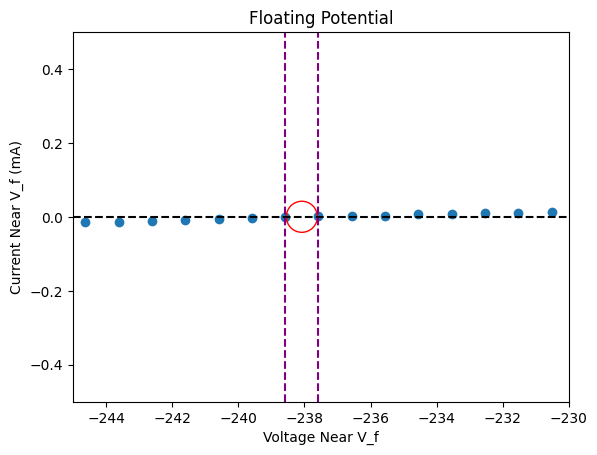

In [15]:
# Finding the floating potential
# Sweep through the left side of the average data and find the intercept point
# Narrowing in on the y-intercept
#print(f'Current Values near x-intercept')
#for i, point in enumerate(y_avg[11:15]):
#    print(f"Current: {point:.2e}, at the {i+10}th data point")
V_f1_min = x_avg[12]
V_f1_max = x_avg[13]

print(f'Minimum Floating Voltage: {V_f1_min:.2f}')
print(f'Maximum Floating Voltage: {V_f1_max:.2f}')
float_value = (V_f1_max+V_f1_min)/2
print(f'Vf = {float_value:.2f} V +/- {abs(float_value):.2f} V')

plt.figure()
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x=V_f1_min, color='purple', linestyle='--')
plt.axvline(x=V_f1_max, color='purple', linestyle='--')
plt.xlim(-245, -230)
plt.ylim(-0.5,0.5)
plt.ylabel('Current Near V_f (mA)')
plt.xlabel('Voltage Near V_f')
plt.title('Floating Potential')
plt.scatter(x_avg, y_avg)
# Circle the floating potential
plt.scatter(x=float_value, y=0, s=500, facecolors='none', edgecolors='red', marker='o',linewidths=1)
plt.savefig('Floating Potential.png')
plt.show()



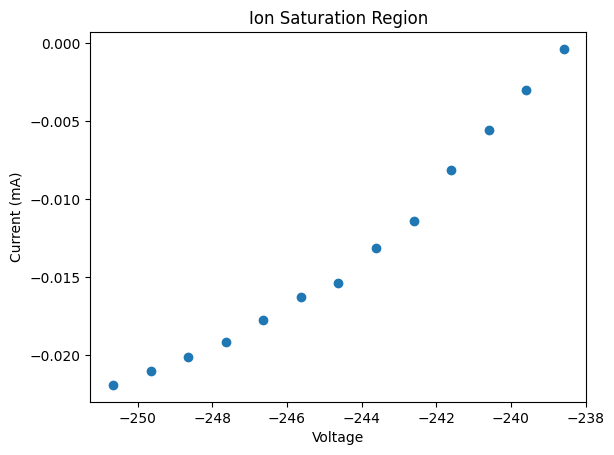

In [ ]:
is_x = x_avg[:13]
is_y = y_avg[:13]

plt.scatter(is_x, is_y)
plt.title('Ion Saturation Region')
plt.ylabel('Current (mA)')
plt.xlabel('Voltage')
plt.show()

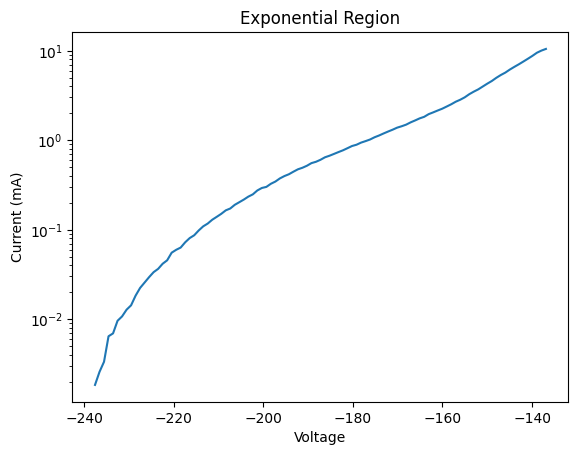

In [41]:
exponential_region_x = x_avg[13:114]
exponential_region_y = y_avg[13:114]
plt.plot(exponential_region_x, exponential_region_y)
plt.title('Exponential Region')
plt.xlabel('Voltage')
plt.ylabel('Current (mA)')
plt.yscale('log')
plt.show()

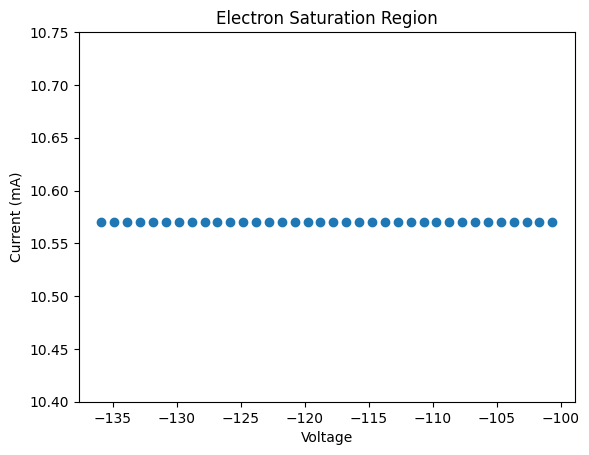

In [ ]:
# Finding the electron saturation region
from scipy.stats import linregress, norm
from scipy.optimize import curve_fit

es_x = x_avg[114:]
es_y = y_avg[114:]

#def linear_model(x, m, c):

#popt, pcov = curve_fit(es_x, es_y)
#print(popt, pcov)

plt.scatter(es_x, es_y)
plt.title('Electron Saturation Region')
plt.ylim(10.4, 10.75)
plt.ylabel('Current (mA)')
plt.xlabel('Voltage')
plt.savefig('Electron Saturation Region.png')
plt.show()